In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import time

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-shows/netflix_titles.csv


# **Exploratory Data Analysis**

In [3]:
#Read csv file
nt = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
nt.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#Number of rows and columns
nt.shape

(8807, 12)

In [5]:
#Columns name
nt.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#Datatype and count non null values
nt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#Summary statistics of object columns
nt.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
#Show if there is full duplicates 
nt.duplicated().sum()

0

In [9]:
nt.to_csv('netflix.csv')

# **Cleaning the Dataset**

# Cleaning Country Column

In [10]:
#Show unique values
#nt['country'].unique()

In [11]:
nt['country'].isna().sum()

831

In [12]:
nt['country'] = nt['country'].fillna(nt['country'].mode()[0])
nt['country'] = nt['country'].astype(str)
nt['country'] = nt['country'].apply(lambda x : x.split(', ')[0])

In [13]:
nt['country'].value_counts()

United States     4041
India             1008
United Kingdom     626
Canada             271
Japan              259
                  ... 
Namibia              1
Senegal              1
Cameroon             1
Syria                1
Somalia              1
Name: country, Length: 89, dtype: int64

# Cleaning Rating column

In [14]:
#Show unique values
nt['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
nt['rating'] = nt['rating'].replace({'74 min' : np.nan, '84 min' : np.nan, '66 min': np.nan
                                    , 'TV-Y7-FV' : 'TV-Y7'})
nt['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'UR'], dtype=object)

# Cleaning Director and Cast columns

In [16]:
nt['director'].isnull().sum()

2634

In [17]:
nt['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [18]:
#Compute the percentage of null values 
null_percent = nt.isnull().sum() * 100 / nt.shape[0]
null_percent.round(2).sort_values(ascending = False)

director        29.91
cast             9.37
date_added       0.11
rating           0.08
duration         0.03
show_id          0.00
type             0.00
title            0.00
country          0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [19]:
#Fill null values with new category
nt['director'].fillna('Unknown', inplace= True)
nt['cast'].fillna('Unknown', inplace= True)

In [20]:
#Fill null values with mode
mode_im = ['date_added','rating','duration']
for i in mode_im:
    nt[i] = nt[i].fillna(nt[i].mode()[0])

In [21]:
nt['month'] = nt['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
nt['year'] = nt['date_added'].apply(lambda x : x.split(', ')[-1])

In [22]:
#Drop useless columns
nt.drop(['show_id','date_added','description'],axis=1, inplace= True)
nt.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
month           0
year            0
dtype: int64

In [23]:
nt.head(5)

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,September,2021
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021
4,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021


# **Data Visualization**

# Which content type has the higher ratio?

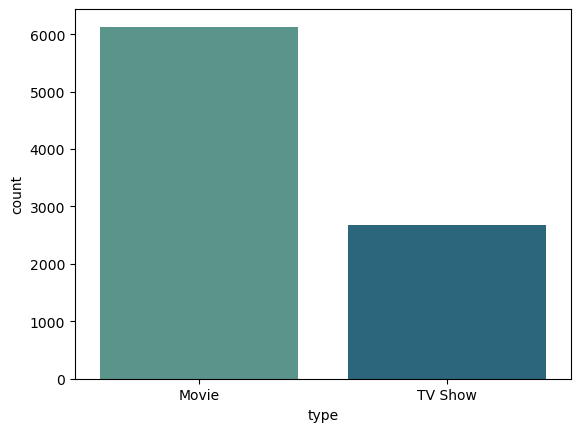

In [24]:
sns.countplot(x ='type', data = nt, palette="crest")
plt.show()

* Number of movies is approximately twice the number of tv shows

# Which month have least releases?

In [25]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df = nt.groupby('year')['month'].value_counts().unstack()[month_order]

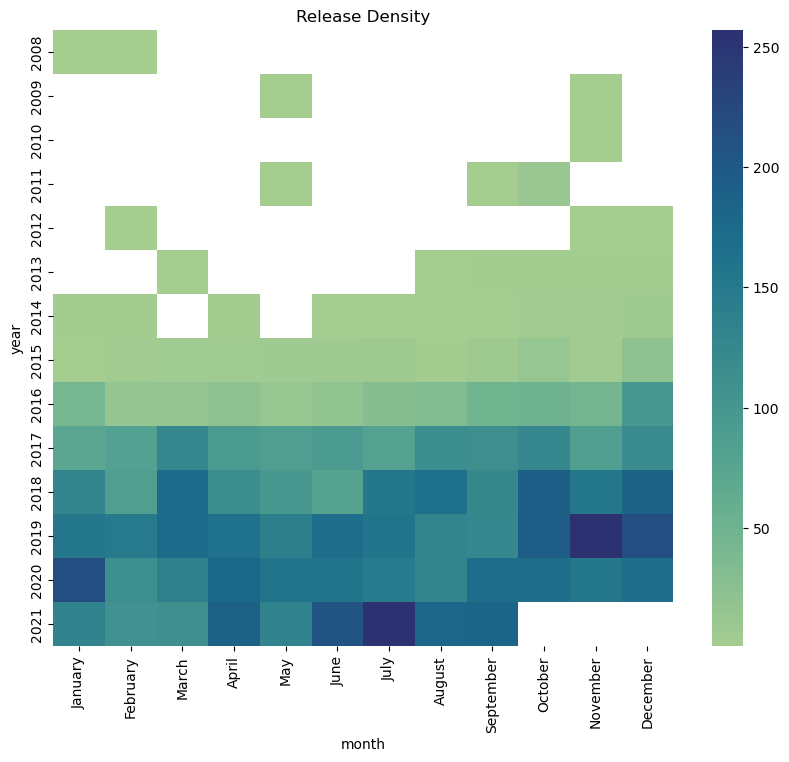

In [26]:
fig,ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.heatmap(df,cmap="crest")
plt.title('Release Density')
plt.show()

* In 2020, the best months to add new content are February, March and May

# Which genre of Movies or TV shows has more content?

In [27]:
#make a dataframe for movies only
movies = (nt['type'] == 'Movie')
movies_df = nt[movies]
movies_df.head(3)
#movies_df.shape

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,September,2021
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91 min,Children & Family Movies,September,2021
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021


In [28]:
#make a dataframe for tvshows only
TV_Show = (nt['type'] == 'TV Show')
tv_df = nt[TV_Show]
tv_df.head(3)

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021


In [29]:
#genres for movies
genres = {}
for genre in movies_df['listed_in']:
    for i in genre.split(','):
        i= i.strip()
        if i not in genres:
            genres[i] =1
        else:
            genres[i] += 1

            
g_m_df = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
g_m_df['Genre'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [30]:
g_m_df.sort_values(by = 'Number of Movies', ascending = False).head()

,Genre,Number of Movies
4,International Movies,2752
2,Dramas,2427
5,Comedies,1674
0,Documentaries,869
11,Action & Adventure,859


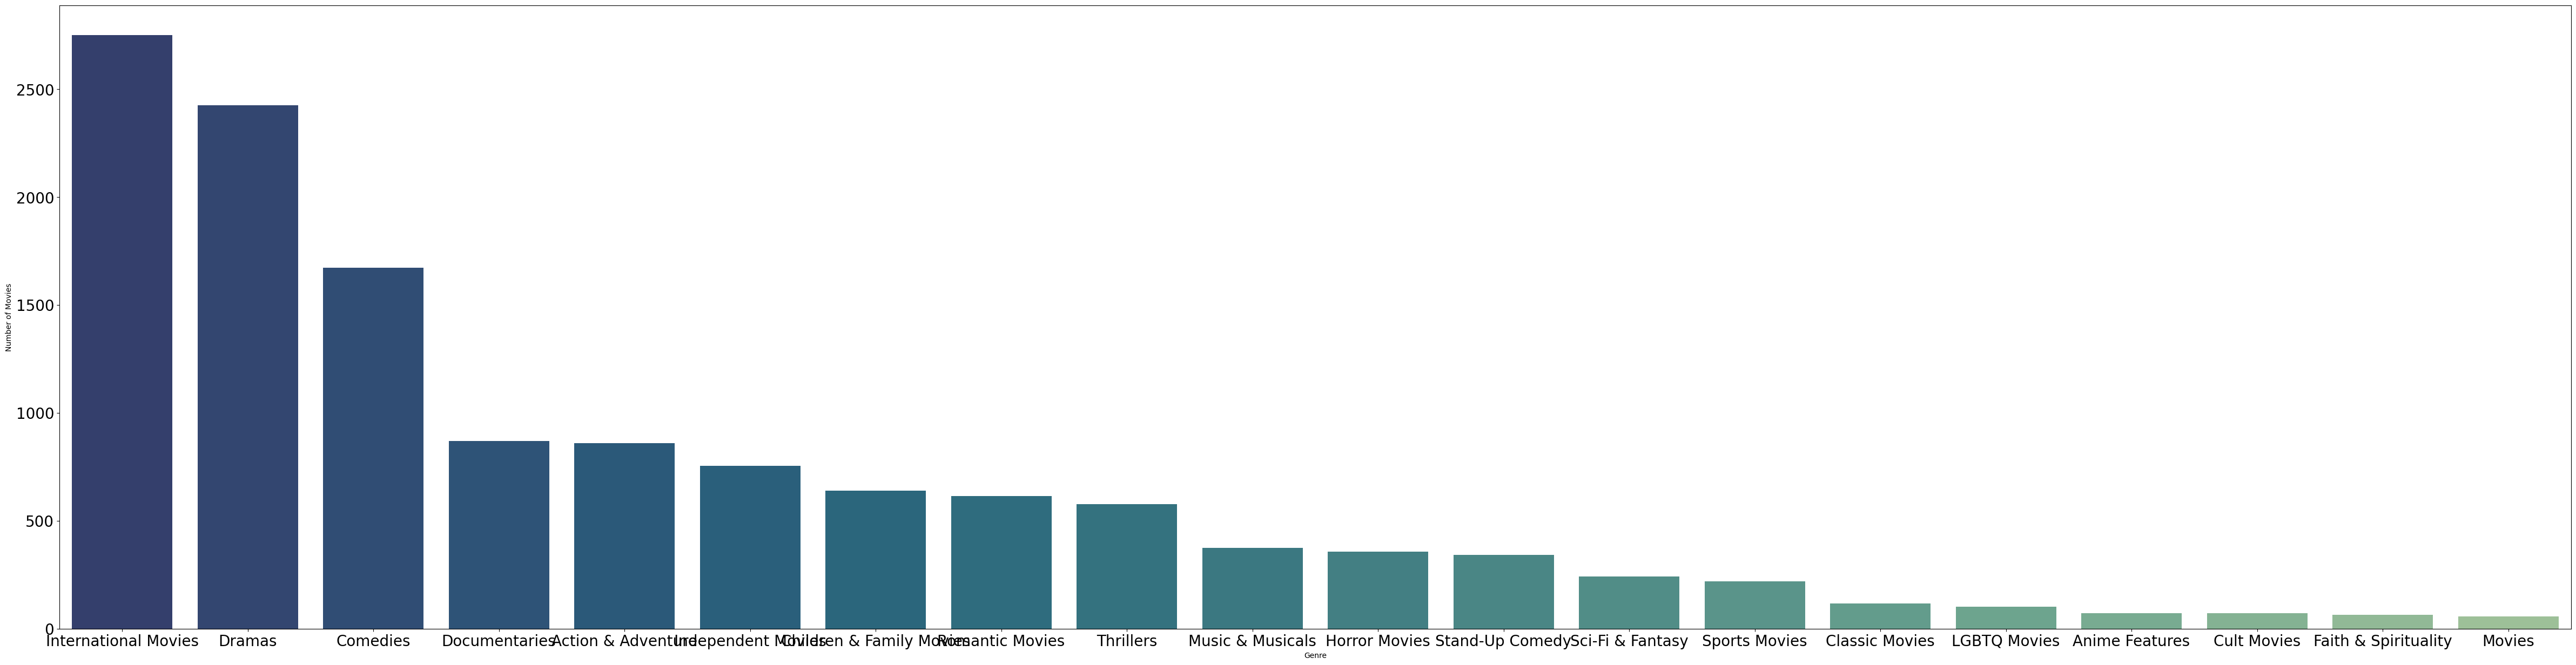

In [31]:
fig, ax = plt.subplots(figsize=(60, 15))
sns.barplot(x='Genre',y='Number of Movies',
            data=g_m_df.sort_values(by = 'Number of Movies', ascending = False),palette='crest_r')
plt.tick_params(labelsize=20)
plt.show()

* The more content in Movie genre is International Movies

In [32]:
#genres for TV shows
genres2 = {}
for genre2 in tv_df['listed_in']:
    for i in genre2.split(','):
        if i not in genres2:
            genres2[i] =1
        else:
            genres2[i] += 1
    

            
g_tv_df = pd.DataFrame(list(genres2.items()), columns= ['Genre', 'Number of TV show'])
g_tv_df.head(3)

,Genre,Number of TV show
0,International TV Shows,774
1,TV Dramas,696
2,TV Mysteries,98


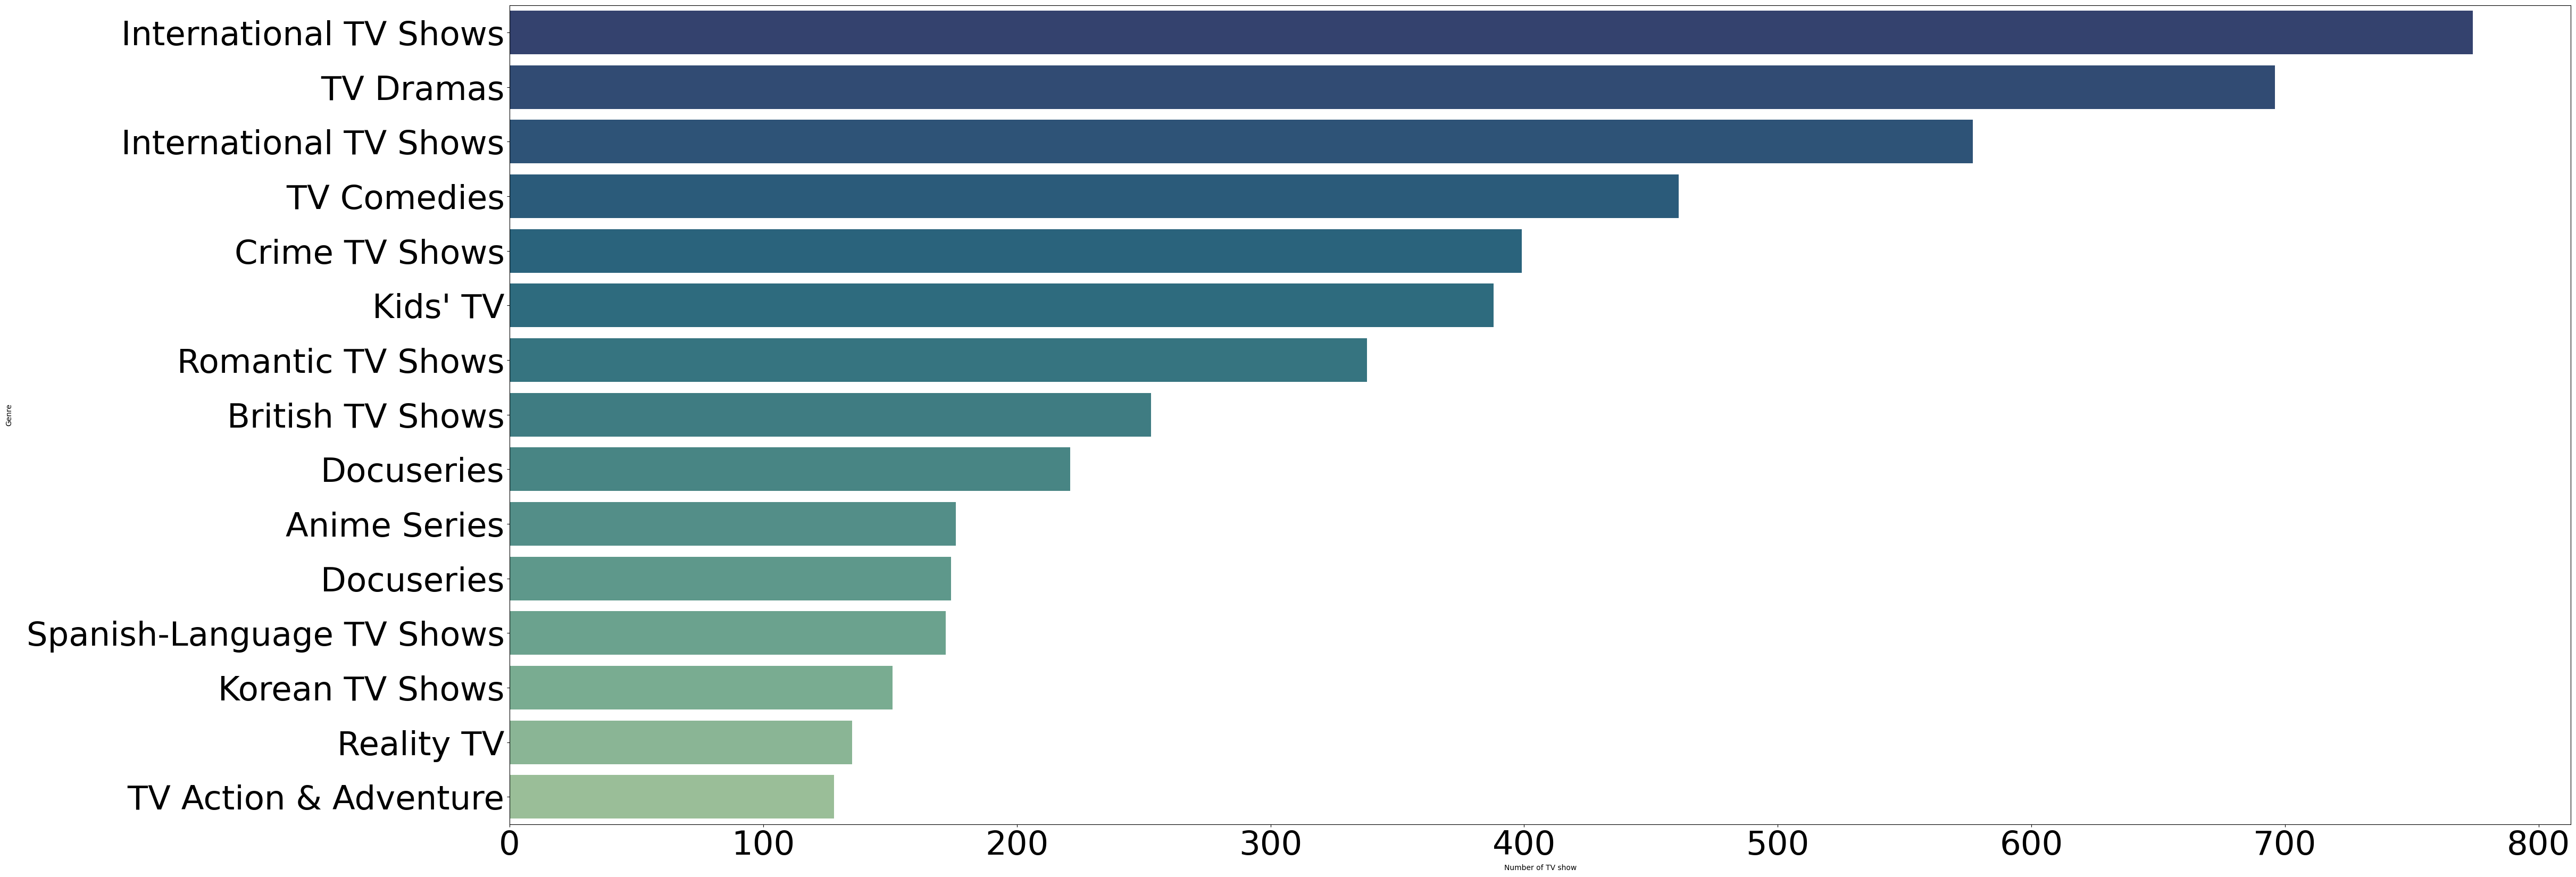

In [33]:
fig, ax = plt.subplots(figsize=(50, 20))
sns.barplot(y='Genre',x='Number of TV show',
            data=g_tv_df.sort_values(by = 'Number of TV show', ascending = False).loc[0:5],
            palette='crest_r')
            
plt.tick_params(labelsize=45)
plt.show()

* The most TV show genre is International TV shows

# In which year more number of movies or TV Shows has been released?

In [34]:
pp = nt.groupby('release_year')['type'].value_counts().unstack(level=-1)

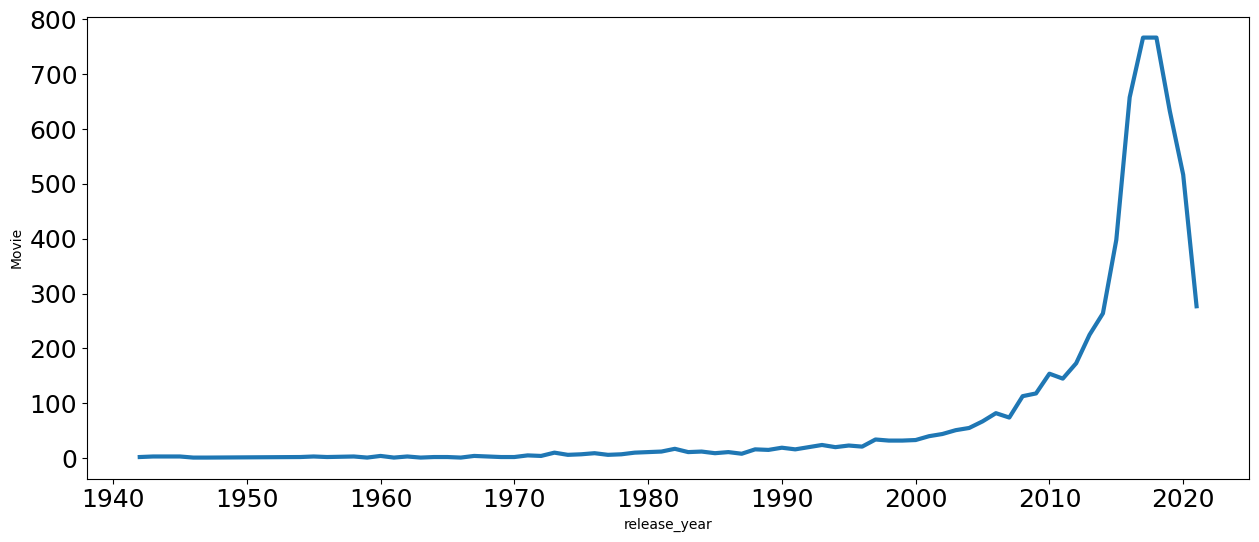

In [35]:
fig, av = plt.subplots(1,1, figsize = (15,6))
ax = sns.lineplot(x='release_year', y='Movie', data=pp,linewidth = 3)
plt.tick_params(labelsize=18)

plt.show()

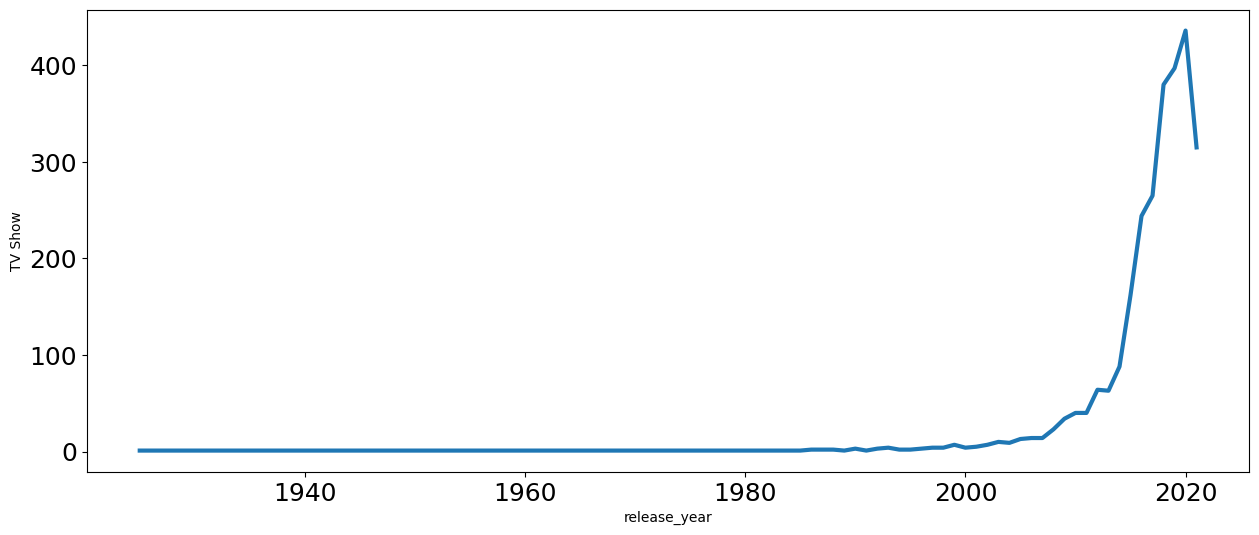

In [36]:
fig, av = plt.subplots(1,1, figsize = (15,6))
ax = sns.lineplot(x='release_year', y='TV Show', data=pp,linewidth = 3)
plt.tick_params(labelsize=18)

plt.show()

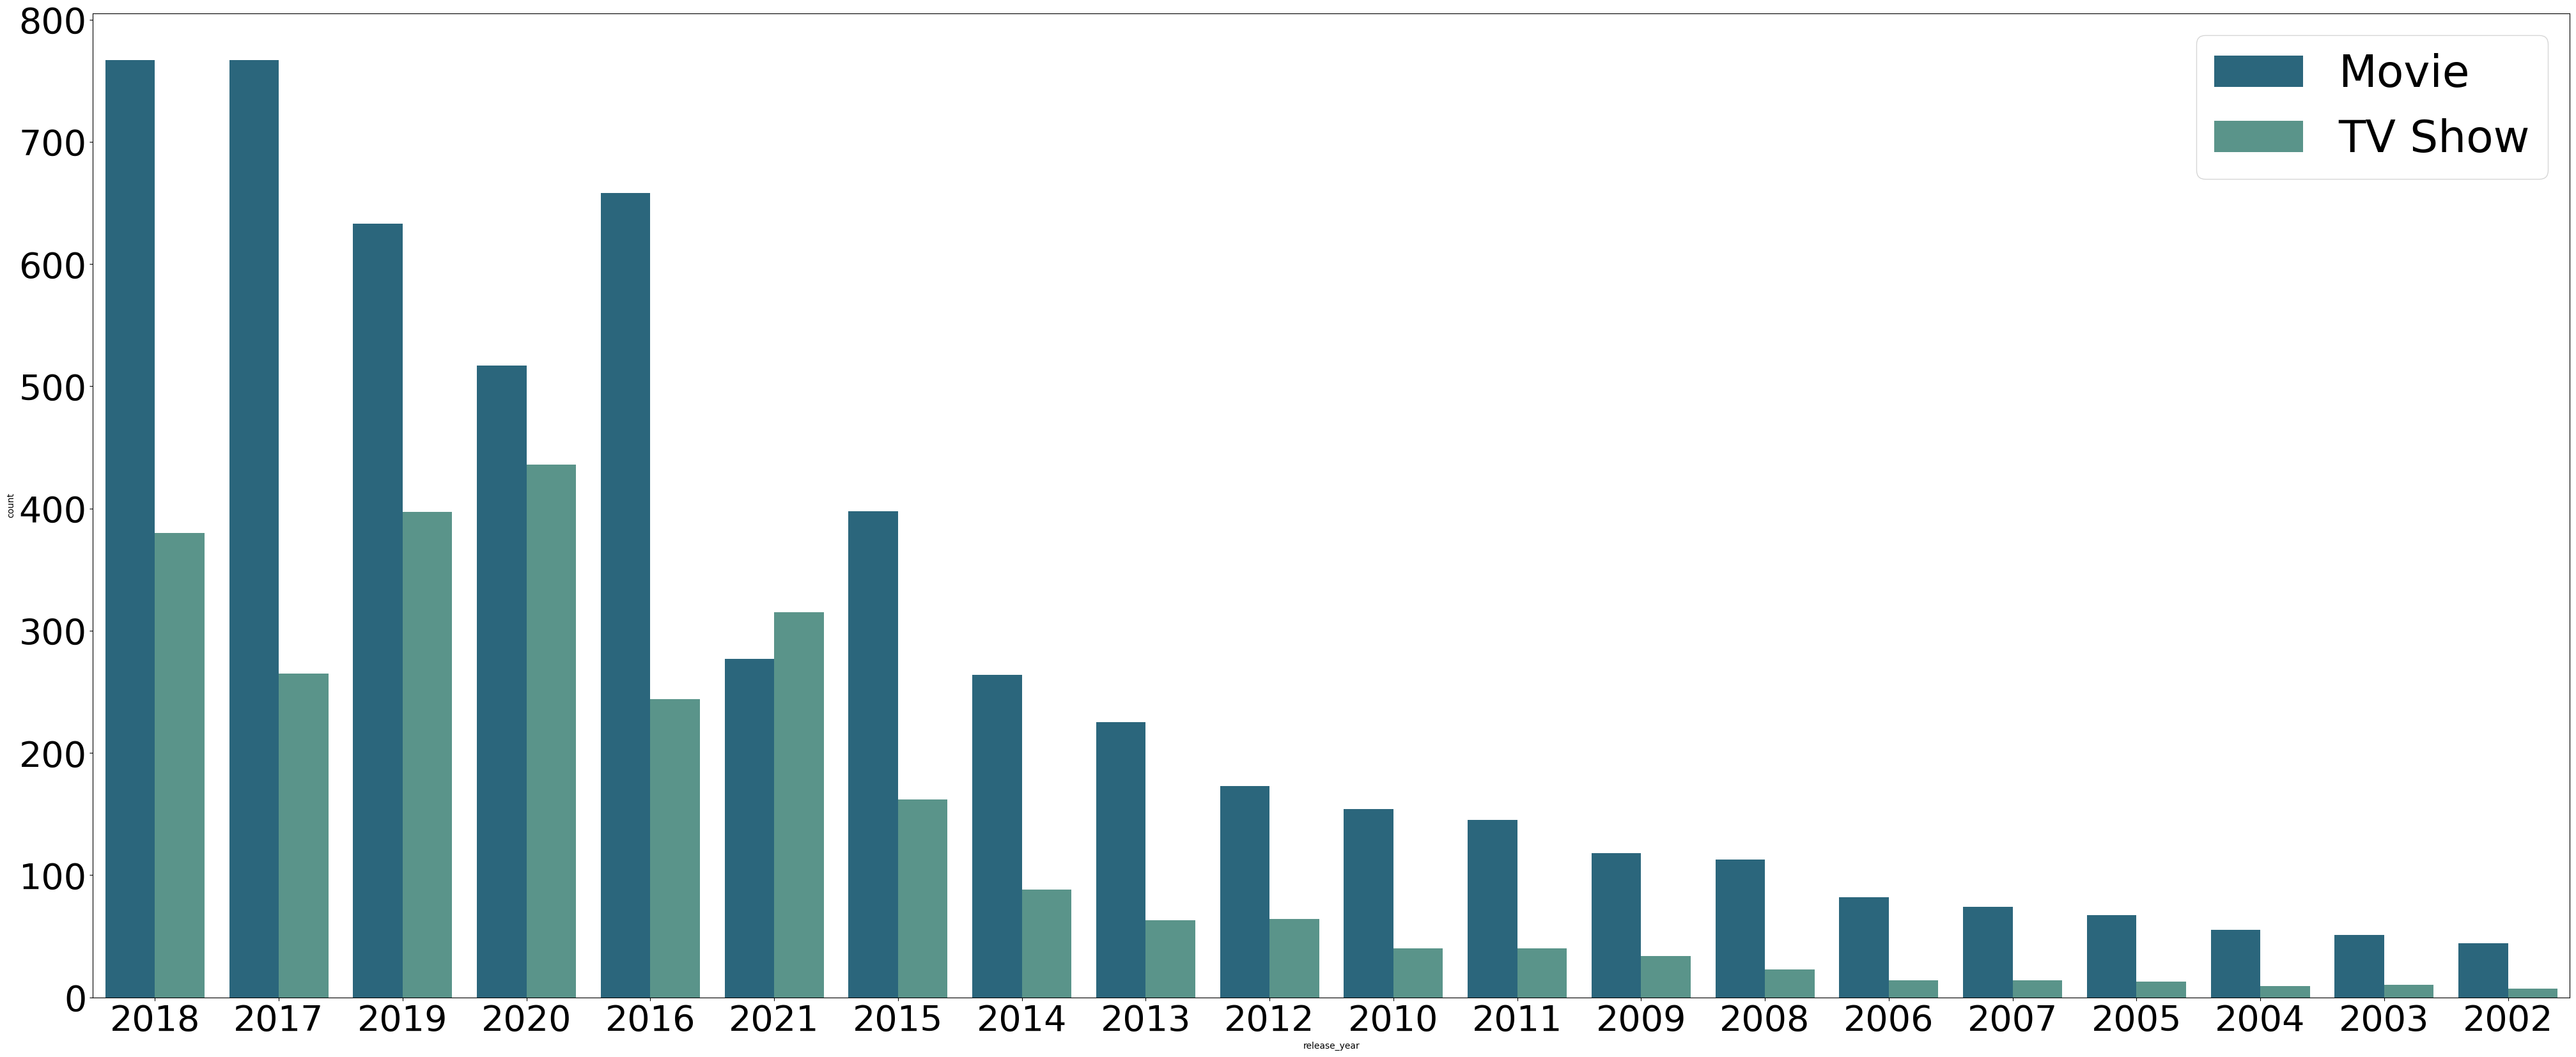

In [37]:
ig, ax = plt.subplots(figsize=(50, 20))
y = sns.countplot(x='release_year',
            data=nt,palette='crest_r', hue='type', order =nt['release_year'].value_counts().index[0:20])

plt.tick_params(labelsize=40)
y.legend(fontsize=50)
plt.show()

* Movies in 2018
* TV Shows in 2020

# Which country has the most release?

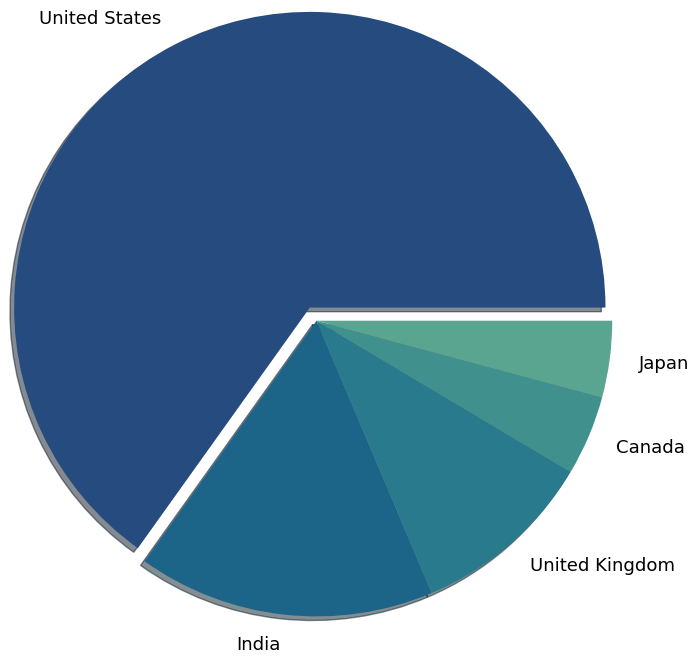

In [38]:
sizes=nt['country'].value_counts()
z = np.zeros(748)
z[0] = 0.1

labels = []
for i in nt['country'].value_counts()[:5].index:
    labels.append(i)

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0)
ax.pie(sizes[:5],explode=z[:5],labels = labels, radius = 2,shadow = True,
       textprops = {'fontsize':13}, colors=sns.color_palette('crest_r'))

plt.show()

* Movies and TV Shows has releasd the most in United States 

# What is the most popular rating in Movies or TV Shows?

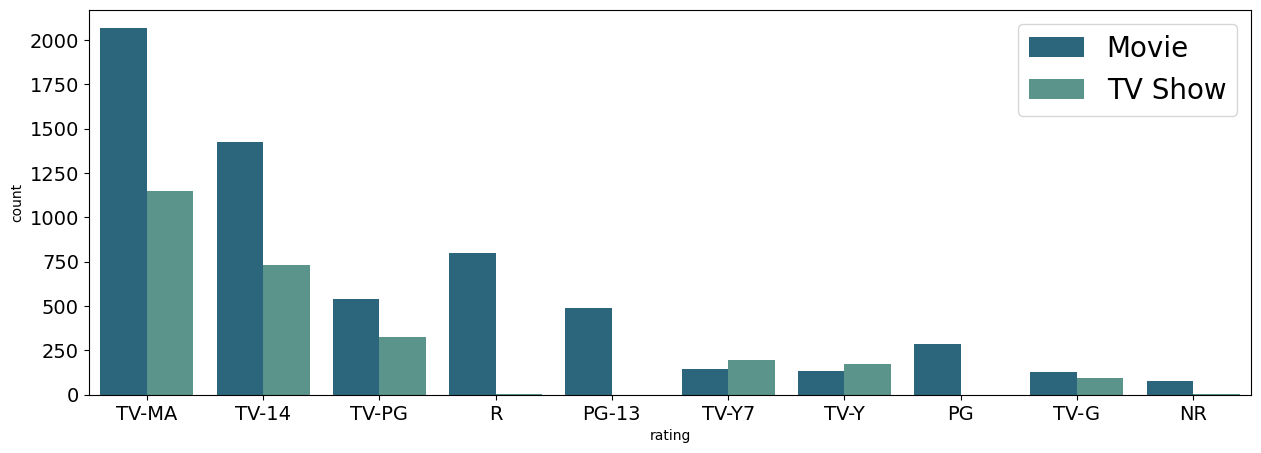

In [39]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.tick_params(labelsize=14)
ax = sns.countplot(x='rating', data=nt, palette='crest_r', hue='type',
                   order=nt['rating'].value_counts().index[0:10])
plt.legend(fontsize=20)

plt.show()

* For Movies and TV Shows TV-MA or Adults is the most popular rating.